In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\Neema MV\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Neema MV\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Neema MV\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Neema MV\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Neema MV\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [79]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


In [2]:
ANZ_Data  = pd.read_excel('ANZ synthesised transaction dataset.xlsx') # Import the dataset 
ANZ_Data.head(10)  # view the first 5 rows of the data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [3]:
ANZ_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [5]:
ANZ_Data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [6]:
ANZ_Data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [46]:
#ANZ_Data.long_lat.str.split
ANZ_Data[['long','lat']] = ANZ_Data.long_lat.str.split(" ",expand=True,)

In [52]:
#ANZ_Data.long_lat.str.split
ANZ_Data[['mlong','mlat']] = ANZ_Data.merchant_long_lat.str.split(" ",expand=True,)

In [67]:
ANZ_Data[( ANZ_Data['long']>113) & (ANZ_Data['long'] < 154) & ( ANZ_Data['lat']>(-44)) & (ANZ_Data['lat'] < (-10))]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,transaction_id,country,customer_id,merchant_long_lat,movement,M-Y,long,lat,mlong,mlat
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,2018-08,153.41,-27.95,153.38,-27.99
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,2018-08,153.41,-27.95,151.21,-33.87
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,2018-08,151.23,-33.94,151.21,-33.87
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,2018-08,153.10,-27.66,153.05,-26.68
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,2018-08,153.41,-27.95,153.44,-28.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,2018-10,149.83,-29.47,145.23,-37.81
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,2018-10,151.22,-33.87,150.88,-33.96
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,2018-10,151.12,-33.89,150.92,-33.74
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,2018-10,144.96,-37.76,145.09,-37.91


In [72]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2-lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [73]:
distances_km = []

In [74]:
for row in ANZ_Data.itertuples(index=False):
   distances_km.append(
       haversine_distance(row.lat, row.long, row.mlat, row.mlong)
   )

In [75]:
ANZ_Data['Distance'] = distances_km

In [76]:
ANZ_Data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,country,customer_id,merchant_long_lat,movement,M-Y,long,lat,mlong,mlat,Distance
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Australia,CUS-2487424745,153.38 -27.99,debit,2018-08,153.41,-27.95,153.38,-27.99,5.34
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Australia,CUS-2487424745,151.21 -33.87,debit,2018-08,153.41,-27.95,151.21,-33.87,690.86
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Australia,CUS-2142601169,151.21 -33.87,debit,2018-08,151.23,-33.94,151.21,-33.87,8.00
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Australia,CUS-1614226872,153.05 -26.68,debit,2018-08,153.10,-27.66,153.05,-26.68,109.08
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Australia,CUS-2487424745,153.44 -28.06,debit,2018-08,153.41,-27.95,153.44,-28.06,12.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,Australia,CUS-55310383,145.23 -37.81,debit,2018-10,149.83,-29.47,145.23,-37.81,1020.08
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,Australia,CUS-2688605418,150.88 -33.96,debit,2018-10,151.22,-33.87,150.88,-33.96,32.93
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,Australia,CUS-2663907001,150.92 -33.74,debit,2018-10,151.12,-33.89,150.92,-33.74,24.89
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,Australia,CUS-1388323263,145.09 -37.91,debit,2018-10,144.96,-37.76,145.09,-37.91,20.21


#### Average Transaction amount is AUD 187.93

C:\Users\Neema MV\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Neema MV\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


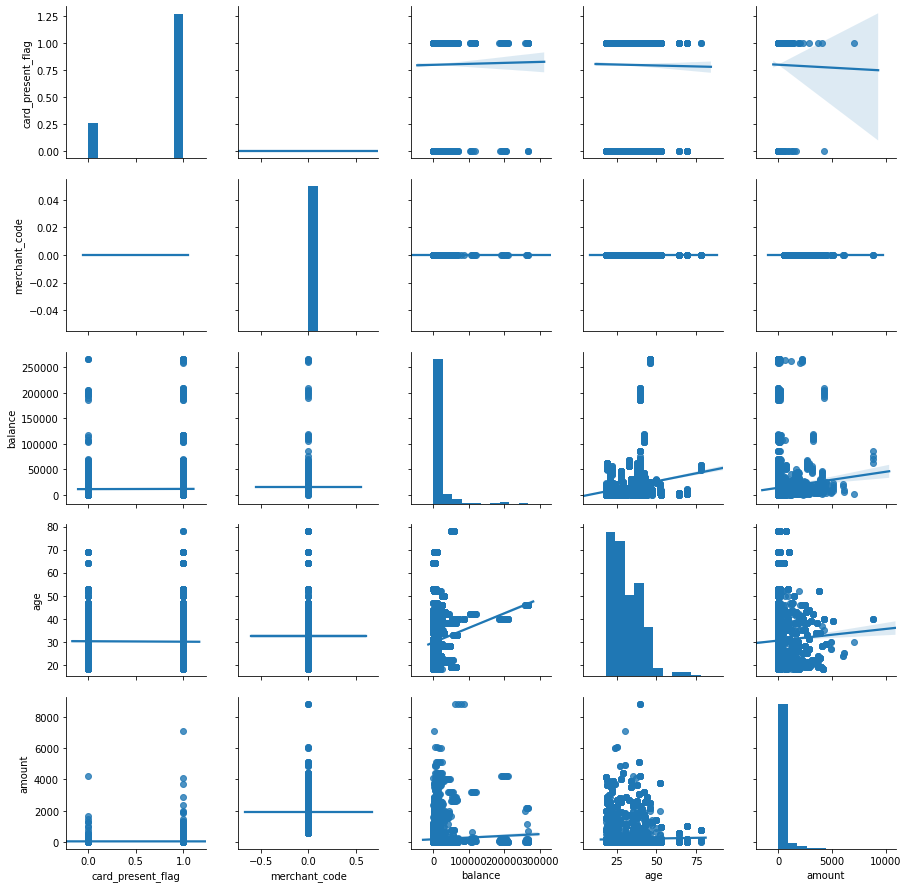

In [8]:
import seaborn as sns

sns.pairplot(ANZ_Data, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

* Balance is positively correlated with age
##### There are not much correlation other than that

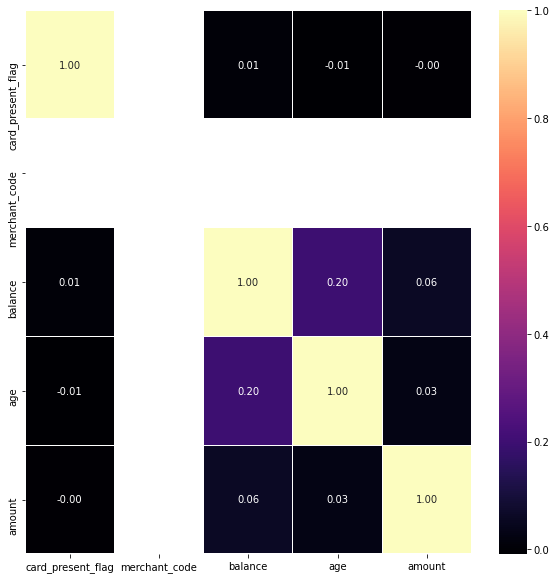

In [9]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(ANZ_Data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

In [10]:
ANZ_Data.skew()

card_present_flag   -1.521103
merchant_code        0.000000
balance              5.497331
age                  1.172319
amount               5.356266
dtype: float64

## Dealing with duplicates

In [11]:
##Identify duplicates records in the data
dupes = ANZ_Data.duplicated()
sum(dupes)

0

## Dealing with missing values

In [12]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( ANZ_Data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
status,0
card_present_flag,4326
bpay_biller_code,11158
account,0
currency,0
long_lat,0
txn_description,0
merchant_id,4326
merchant_code,11160
first_name,0


* seems like 4326 records have missing merchant_state, merchant_long_lat, merchnat_suburb, merchant_id, card_present_flag

In [13]:
ANZ_Data.dropna(subset=['card_present_flag'])

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [16]:
pd.DataFrame( ANZ_Data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
status,0
card_present_flag,4326
bpay_biller_code,11158
account,0
currency,0
long_lat,0
txn_description,0
merchant_id,4326
merchant_code,11160
first_name,0


In [17]:
ANZ_Data_final= ANZ_Data[ANZ_Data.card_present_flag.notnull()]

### Dealing with outliers

<AxesSubplot:xlabel='balance'>

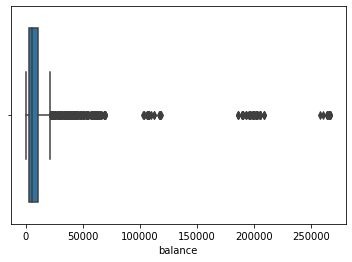

In [18]:
import seaborn as sns     # library for advance visualization
sns.boxplot(x=ANZ_Data_final['balance'])   # box plot

<AxesSubplot:xlabel='amount'>

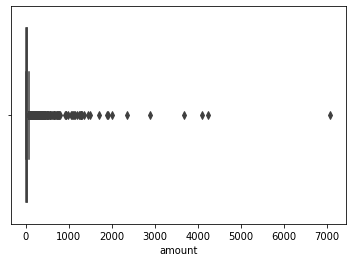

In [19]:
import seaborn as sns     # library for advance visualization
sns.boxplot(x=ANZ_Data_final['amount'])   # box plot

C:\Users\Neema MV\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


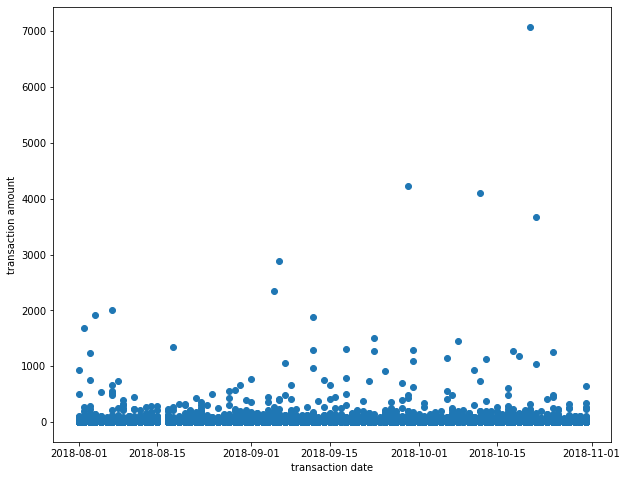

In [20]:
fig, ax = plt.subplots(figsize=(10,8))   # setting the figure size of the plot
ax.scatter(ANZ_Data_final['date'], ANZ_Data_final['amount'])  # scatter plot
ax.set_xlabel('transaction date')
ax.set_ylabel('transaction amount')
plt.show()

#### How many transactions do customers make each month, on average?

In [22]:
ANZ_Data.groupby([ANZ_Data['date'].dt.year, ANZ_Data['date'].dt.month]).customer_id.agg({'count'})

count
date date       
2018 8      3943
     9      4013
     10     4087

#### Each month transactions are high in month of October

In [23]:
ANZ_Data['M-Y'] = ANZ_Data.date.dt.strftime('%Y-%m')

In [24]:
ANZ_Data.groupby(['customer_id', 'M-Y']).sum().reset_index().groupby('customer_id').mean()  

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,13.000000,0.0,5.537907e+04,1289.666667,5422.990000
CUS-1117979751,14.333333,0.0,3.276643e+05,700.000000,11328.123333
CUS-1140341822,17.666667,0.0,1.519790e+05,746.666667,5670.200000
CUS-1147642491,19.000000,0.0,3.552918e+05,1337.333333,9660.273333
CUS-1196156254,42.666667,0.0,1.818915e+06,2776.666667,12016.906667
...,...,...,...,...,...
CUS-72755508,13.000000,0.0,8.695277e+04,676.666667,3812.790000
CUS-809013380,23.333333,0.0,1.552853e+05,868.000000,6270.030000
CUS-860700529,54.333333,0.0,2.689034e+05,2330.000000,6033.293333


In [25]:
g = ANZ_Data.groupby(["M-Y"])

In [26]:
monthly_averages = g.aggregate({"amount":np.mean})

In [27]:
monthly_averages

,amount
M-Y,
2018-08,185.121867
2018-09,182.045903
2018-10,196.427323


In [28]:
ANZ_Data.date = pd.to_datetime(ANZ_Data.date)

In [29]:
ANZ_Data_2 = ANZ_Data.groupby(ANZ_Data.date.dt.strftime('%Y-%m')).amount.agg(['mean'])

In [30]:
ANZ_Data_2

,mean
date,
2018-08,185.121867
2018-09,182.045903
2018-10,196.427323


#### Avg Transaction volumne by month

#### Task 2:
#### Annual salary of each customer

In [32]:
ANZ_Data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,M-Y
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,2018-08
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,2018-08
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,2018-08
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,2018-08
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,2018-10
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,2018-10
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,2018-10
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,2018-10


In [182]:
ANZ_Data_salary = ANZ_Data[ANZ_Data["txn_description"]=='PAY/SALARY']


In [45]:
ANZ_Data_salary_aug = ANZ_Data_salary[ANZ_Data["M-Y"]=='2018-08']
ANZ_Data_salary_aug

C:\Users\Neema MV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,M-Y
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,2018-08
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,2018-08
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,2018-08
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,2018-08
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,posted,NaN,0,ACC-3741880913,AUD,150.50 -23.40,PAY/SALARY,NaN,0.0,Ashley,...,NaN,NaN,2018-08-31T16:00:00.000+0000,2282.36,a241350330274e5f8f16fed5eb37b5e8,Australia,CUS-1220154422,NaN,credit,2018-08
3876,posted,NaN,0,ACC-964839203,AUD,146.92 -36.07,PAY/SALARY,NaN,0.0,Michael,...,NaN,NaN,2018-08-31T16:00:00.000+0000,1560.20,09119bfd8bfb47e68a2578ff69fd5485,Australia,CUS-2059096722,NaN,credit,2018-08
3884,posted,NaN,0,ACC-2901672282,AUD,255.00 -573.00,PAY/SALARY,NaN,0.0,Daniel,...,NaN,NaN,2018-08-31T17:00:00.000+0000,3328.77,e31dccf666dd4520b1c3636f5f81ca1e,Australia,CUS-1617121891,NaN,credit,2018-08
3885,posted,NaN,0,ACC-3317636250,AUD,153.02 -27.66,PAY/SALARY,NaN,0.0,Kenneth,...,NaN,NaN,2018-08-31T17:00:00.000+0000,2544.76,d0afe39d68e244d6a8b87cc1e2ff1f77,Australia,CUS-2738291516,NaN,credit,2018-08


In [139]:
ANZ_Data_salary_final = ANZ_Data_salary.groupby(['customer_id','gender','age','M-Y'],as_index=False).amount.sum()

#### Create additional columns for age bins

In [140]:
ANZ_Data_salary_final['age_below_20'] = [1 if x < 20 else 0 for x in ANZ_Data_salary_final['age']]
ANZ_Data_salary_final['age_btw_20n40'] = [1 if x >= 20 and x < 40 else 0 for x in ANZ_Data_salary_final['age']]
ANZ_Data_salary_final['age_btw_40n60'] = [1 if x >= 40 and x < 60 else 0 for x in ANZ_Data_salary_final['age']]
ANZ_Data_salary_final['age_above_60'] = [1 if x >=60 else 0 for x in ANZ_Data_salary_final['age']]

In [143]:
ANZ_Data_salary_final

,customer_id,gender,age,M-Y,amount,age_below_20,age_btw_20n40,age_btw_40n60,age_above_60
0,CUS-1005756958,F,53,2018-08,3881.88,0,0,1,0
1,CUS-1005756958,F,53,2018-09,3881.88,0,0,1,0
2,CUS-1005756958,F,53,2018-10,4852.35,0,0,1,0
3,CUS-1117979751,M,21,2018-08,7157.30,0,1,0,0
4,CUS-1117979751,M,21,2018-09,7157.30,0,1,0,0
...,...,...,...,...,...,...,...,...,...
291,CUS-880898248,M,26,2018-09,2867.96,0,1,0,0
292,CUS-880898248,M,26,2018-10,2867.96,0,1,0,0
293,CUS-883482547,F,19,2018-08,7954.92,1,0,0,0
294,CUS-883482547,F,19,2018-09,7954.92,1,0,0,0


#### Create dataframe for balance

In [131]:
ANZ_Data_balance = ANZ_Data_salary.groupby(['customer_id', 'M-Y'], as_index=False).balance.sum()

#### Join both the dataframes into one

In [145]:
ANZ_Data_Salary_final_1 = pd.merge(ANZ_Data_salary_final, ANZ_Data_balance, on = 'customer_id', how='inner')

#### Multiple salary by month * 12 for annual salary

In [146]:
ANZ_Data_Salary_final_1['annually'] = ANZ_Data_Salary_final_1['amount']*12.00

In [148]:
ANZ_Data_Salary_final_1[ANZ_Data_Salary_final_1['customer_id']=='CUS-1005756958']

,customer_id,gender,age,M-Y_x,amount,age_below_20,age_btw_20n40,age_btw_40n60,age_above_60,M-Y_y,balance,annually
0,CUS-1005756958,F,53,2018-08,3881.88,0,0,1,0,2018-08,6363.18,46582.56
1,CUS-1005756958,F,53,2018-08,3881.88,0,0,1,0,2018-09,16278.02,46582.56
2,CUS-1005756958,F,53,2018-08,3881.88,0,0,1,0,2018-10,38701.45,46582.56
3,CUS-1005756958,F,53,2018-09,3881.88,0,0,1,0,2018-08,6363.18,46582.56
4,CUS-1005756958,F,53,2018-09,3881.88,0,0,1,0,2018-09,16278.02,46582.56
5,CUS-1005756958,F,53,2018-09,3881.88,0,0,1,0,2018-10,38701.45,46582.56
6,CUS-1005756958,F,53,2018-10,4852.35,0,0,1,0,2018-08,6363.18,58228.20
7,CUS-1005756958,F,53,2018-10,4852.35,0,0,1,0,2018-09,16278.02,58228.20
8,CUS-1005756958,F,53,2018-10,4852.35,0,0,1,0,2018-10,38701.45,58228.20


#### Scatterplot between age and annual salary

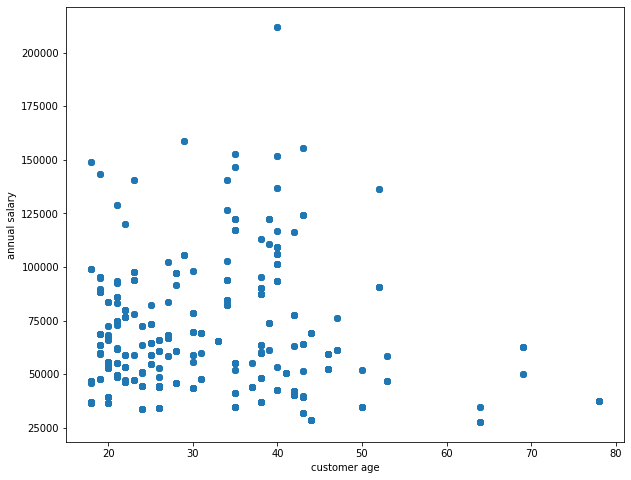

In [149]:
fig, ax = plt.subplots(figsize=(10,8))   # setting the figure size of the plot
ax.scatter(ANZ_Data_Salary_final_1['age'], ANZ_Data_Salary_final_1['annually'])  # scatter plot
ax.set_xlabel('customer age')
ax.set_ylabel('annual salary')
plt.show()

* Based on the above scatterplot:
* It is shown that the salary is more concerntrated around 45000 - 100000 between the age 20 to 50
* Above 50 xustomers are payed relatively less than the younger age group
* There is one customer with age at 40 years earning greater than 200K salary annually

#### Plot annual salary distribution

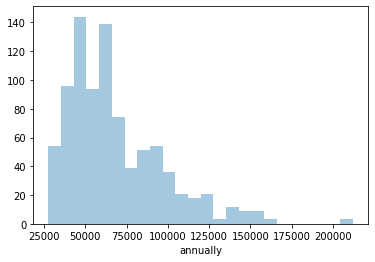

In [174]:
sns.distplot(ANZ_Data_Salary_final_1['annually'], kde=False, rug=False);

* Salary is right skewed distribution

#### Plots for gender vs salary distribution

<AxesSubplot:xlabel='gender_M', ylabel='annually'>

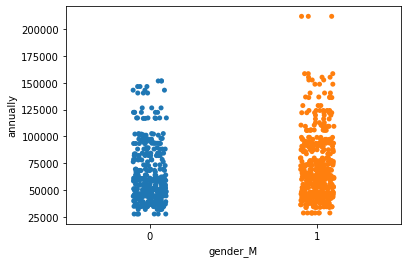

In [180]:
sns.stripplot(ANZ_Data_Salary_final_1['gender_M'], ANZ_Data_Salary_final_1['annually'])

<AxesSubplot:xlabel='gender_F', ylabel='annually'>

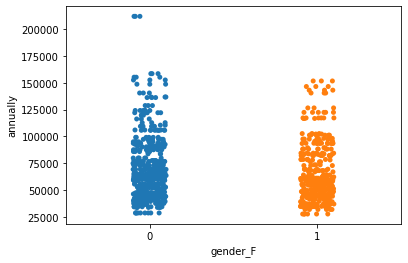

In [181]:
sns.stripplot(ANZ_Data_Salary_final_1['gender_F'], ANZ_Data_Salary_final_1['annually'])

* From the above gender across salary plots, we can see men are earning more salary compared to female

#### Create dummies for the simple regression

In [152]:
ANZ_Data_Salary_final_1 = pd.get_dummies(ANZ_Data_Salary_final_1, columns=['M-Y_y'])
ANZ_Data_Salary_final_1.head()

,customer_id,gender,age,M-Y_x,amount,age_below_20,age_btw_20n40,age_btw_40n60,age_above_60,balance,annually,M-Y_y_2018-08,M-Y_y_2018-09,M-Y_y_2018-10
0,CUS-1005756958,F,53,2018-08,3881.88,0,0,1,0,6363.18,46582.56,1,0,0
1,CUS-1005756958,F,53,2018-08,3881.88,0,0,1,0,16278.02,46582.56,0,1,0
2,CUS-1005756958,F,53,2018-08,3881.88,0,0,1,0,38701.45,46582.56,0,0,1
3,CUS-1005756958,F,53,2018-09,3881.88,0,0,1,0,6363.18,46582.56,1,0,0
4,CUS-1005756958,F,53,2018-09,3881.88,0,0,1,0,16278.02,46582.56,0,1,0


In [158]:
ANZ_Data_Salary_final_1 = pd.get_dummies(ANZ_Data_Salary_final_1, columns=['gender'])

In [163]:
ANZ_Data_Salary_final_1 = ANZ_Data_Salary_final_1.drop(['M-Y_x'], axis=1)

In [164]:
ANZ_Data_Salary_final_1

,customer_id,age,amount,age_below_20,age_btw_20n40,age_btw_40n60,age_above_60,balance,annually,M-Y_y_2018-08,M-Y_y_2018-09,M-Y_y_2018-10,gender_F,gender_M
0,CUS-1005756958,53,3881.88,0,0,1,0,6363.18,46582.56,1,0,0,1,0
1,CUS-1005756958,53,3881.88,0,0,1,0,16278.02,46582.56,0,1,0,1,0
2,CUS-1005756958,53,3881.88,0,0,1,0,38701.45,46582.56,0,0,1,1,0
3,CUS-1005756958,53,3881.88,0,0,1,0,6363.18,46582.56,1,0,0,1,0
4,CUS-1005756958,53,3881.88,0,0,1,0,16278.02,46582.56,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,CUS-883482547,19,7954.92,1,0,0,0,22486.90,95459.04,0,1,0,1,0
876,CUS-883482547,19,7954.92,1,0,0,0,53327.66,95459.04,0,0,1,1,0
877,CUS-883482547,19,11932.38,1,0,0,0,13078.52,143188.56,1,0,0,1,0
878,CUS-883482547,19,11932.38,1,0,0,0,22486.90,143188.56,0,1,0,1,0


In [165]:
# lets build our linear model
# independant variables
#cust_salary['annually']
X = ANZ_Data_Salary_final_1.drop(['annually','customer_id'], axis=1)
# the dependent variable
y = ANZ_Data_Salary_final_1[['annually']]

In [166]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [167]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 4.074331706235021e-12
The coefficient for amount is 11.999999999999996
The coefficient for age_below_20 is -5.476243875143956e-12
The coefficient for age_btw_20n40 is -7.566182801273767e-12
The coefficient for age_btw_40n60 is -2.7844756597564073e-11
The coefficient for age_above_60 is 4.0885397443925914e-11
The coefficient for balance is 1.7763568394002505e-15
The coefficient for M-Y_y_2018-08 is -3.870640549882235e-14
The coefficient for M-Y_y_2018-09 is 6.385098956080391e-13
The coefficient for M-Y_y_2018-10 is -5.998034574984483e-13
The coefficient for gender_F is -3.950020829104488e-13
The coefficient for gender_M is 3.9500207973407523e-13


In [169]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.0372681319713593e-10


In [170]:
regression_model.score(X_train, y_train)

1.0

In [171]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)


1.0

#### The data is inaccurate to predict over annual salary